In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('wick.txt', sep='\\s+')
data.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1914,1,5.9,0.9,---,48.3,---
1,1914,2,7.7,2.3,---,66.0,---
2,1914,3,6.4,1.1,---,76.7,---
3,1914,4,10.8,4.4,---,27.9,---
4,1914,5,10.7,4.4,---,61.0,---


In [ ]:
y_real = data.groupby('yyyy')['rain'].mean()
mmean = y_real.mean()
mstd = y_real.std()
mvar = y_real.var()
mmin = y_real.min()
mmedian = y_real.median()
mmax = y_real.max()
x = list(range(1914, 2018))
size = y_real.size

In [26]:
mstd

7.782107466912585

#### В качестве случайной величины выбрано среднее количество осадков за год, mm

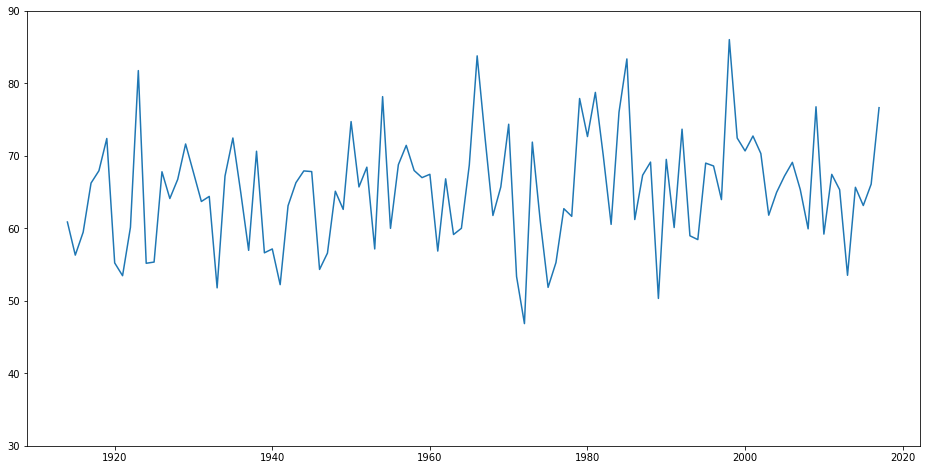

In [4]:
fig, axes = plt.subplots(figsize=(16, 8))
plt.ylim(30, 90)
plt.plot(x, y_real);

#### Гистограмма и ядерная оценка плотности вероятности

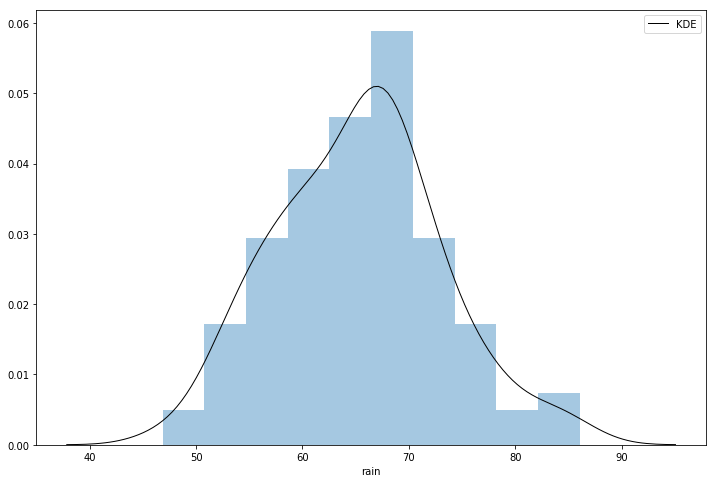

In [5]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.distplot(y_real, bins=10, ax=axes, kde_kws={"color": "k", "lw": 1, "label": "KDE", "bw": "3"});

#### Теоретические распределения

In [7]:
y_normal = np.random.normal(mmean, mstd, size)
y_triangular = [y for y in np.random.triangular(size=100, left=mmin, right=mmax, mode=mmedian)]

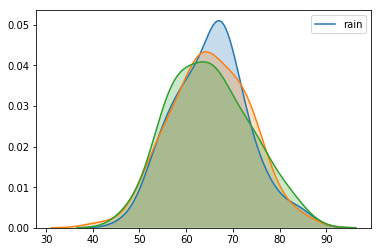

In [8]:
sns.kdeplot(y_real, shade=True)
sns.kdeplot(y_normal, shade=True)
sns.kdeplot(y_triangular, shade=True);

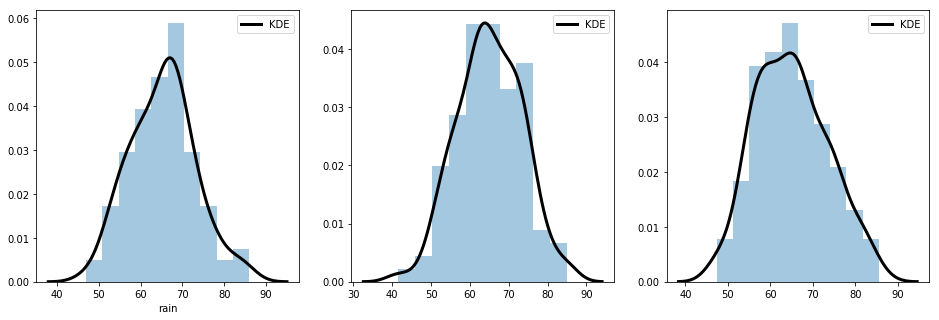

In [9]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3, nrows=1)
sns.distplot(y_real, bins=10, ax=axes[0], kde_kws={"color": "k", "lw": 3, "label": "KDE", "bw": "3"})
sns.distplot(y_normal, bins=10, ax=axes[1], kde_kws={"color": "k", "lw": 3, "label": "KDE", "bw": "3"})
sns.distplot(y_triangular, bins=10, ax=axes[2], kde_kws={"color": "k", "lw": 3, "label": "KDE", "bw": "3"});

#### Оценить параметры распределения, используя 3 различных метода

В данном случае теоретическим распределением является нормальное. У нормального распределения параметры полученные методом моментов и методом максимального правдоподобия равны выборочному среднему и выборочной дисперсии. 

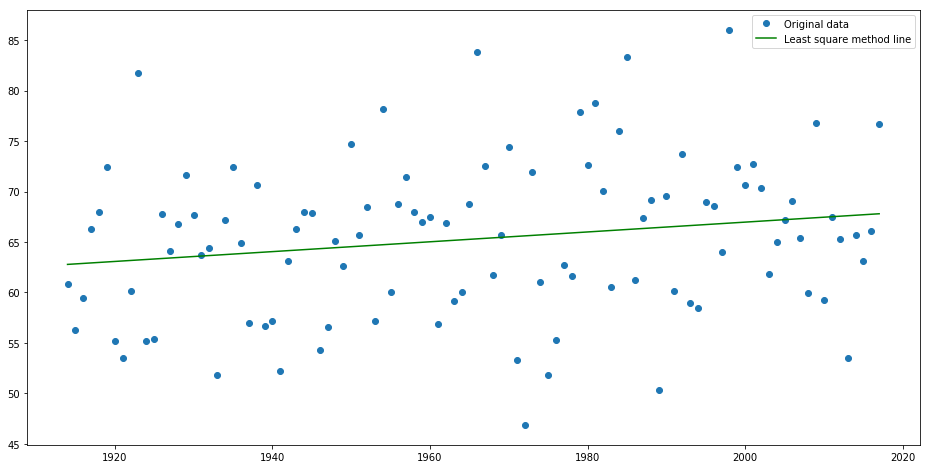

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_real)
plt.plot(x, y_real, 'o', label='Original data')
plt.plot(x, intercept + slope * np.array(x), 'g', label='Least square method line')
plt.legend();

In [22]:
slope, intercept, r_value, p_value, std_err

(0.048727328496745943,
 -30.485182750097749,
 0.18888439257408038,
 0.054820938273627468,
 0.025083471040195402)

### QQ biplots

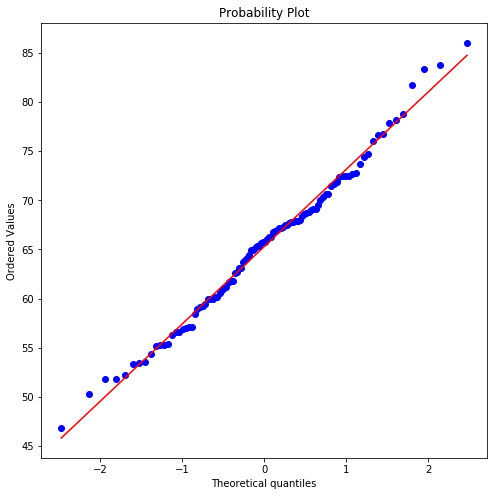

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
res = stats.probplot(y_real, dist=stats.distributions.norm, plot=ax)
plt.show()

#### Моделирование распределения

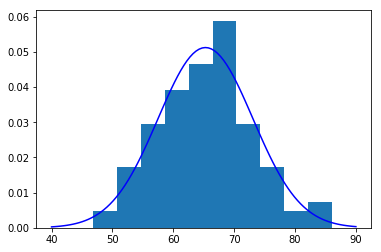

In [12]:
x = np.linspace(40, 90, 100, endpoint=True)
pdf = [norm.pdf(_, loc=mmean, scale=mstd) for _ in x]

plt.plot(x, pdf, 'b-')
plt.hist(y_real, normed=1);

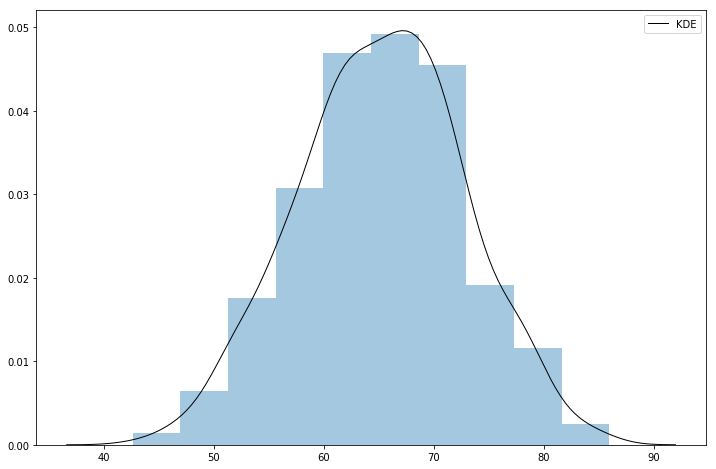

In [13]:
simulation_1 = []
for i in range(1000):
    simulation_1.append(np.random.uniform(size=12).sum()-6)
fig, axes = plt.subplots(figsize=(12, 8))
simulation_1 = np.array(simulation_1)
simulation_1 = mstd * simulation_1 + mmean
sns.distplot(simulation_1, bins=10, ax=axes, kde_kws={"color": "k", "lw": 1, "label": "KDE", "bw": "2"});

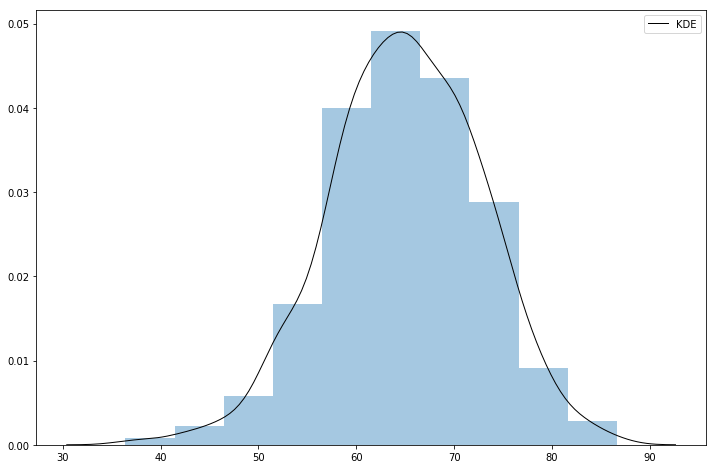

In [14]:
simulation_2 = []
for i in range(1000):
    simulation_2.append(np.sqrt(-2*np.log(np.random.uniform(size=1)))*np.cos(2*np.pi*np.random.uniform(size=1)))
simulation_2 = np.array(simulation_2)
fig, axes = plt.subplots(figsize=(12, 8))
simulation_2 = mstd * simulation_2 + mmean
sns.distplot(simulation_2, bins=10, ax=axes, kde_kws={"color": "k", "lw": 1, "label": "KDE", "bw": "2"});

In [15]:
geom_x = []
geom_y = []
for i in range(1000):
    kx1 = np.random.uniform(size=1)
    kx2 = np.random.uniform(size=1)
    
    gM = max(pdf)
    
    k_x1 = mmin + (mmax - mmin) * kx1
    k_x2 = gM * kx2
    
    if k_x2 < norm.pdf(k_x1, loc=mmean, scale=mstd):
        geom_x.append(k_x1)
        geom_y.append(k_x2)

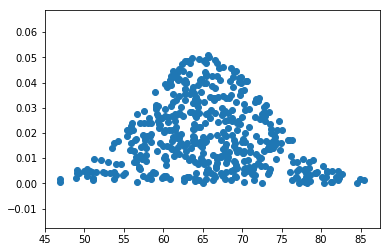

In [16]:
plt.scatter(geom_x, geom_y);

In [17]:
step = (mmax-mmin)/10

In [18]:
x = np.linspace(mmin, mmax, 21, endpoint=True)
norm_hist = [norm.pdf(_, loc=mmean, scale=mstd) for _ in x]

In [19]:
norm_heights = []
for i in range(1, len(norm_hist), 2):
    norm_heights.append(norm_hist[i])

In [20]:
pk = np.array(norm_heights)*step
pk[pk.size//2] += 1 - pk.sum()
random_selector = stats.rv_discrete(values=(np.arange(0, 10), pk))

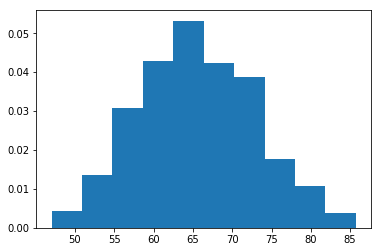

In [21]:
simulation_4 = []
for i in range(1000):
    index_of_interval = random_selector.rvs()
    kdy = np.random.uniform(size=1, low=0, high=step)[0]
    simulation_4.append(x[index_of_interval*2] + kdy)
plt.hist(simulation_4, normed=1, bins=10);